**Assignment 2B**\
**Jule Valendo Halim -1425567**\
**4/24/2024**

# Question 1

Number of Entries: 54017
Number of Unique Doctors: 19097 

Distribution of Ratings:
 rating
 1    38847
-1    15170
Name: count, dtype: int64


<Axes: title={'center': 'Distribution Graph of Ratings'}, xlabel='Count', ylabel='Rating'>

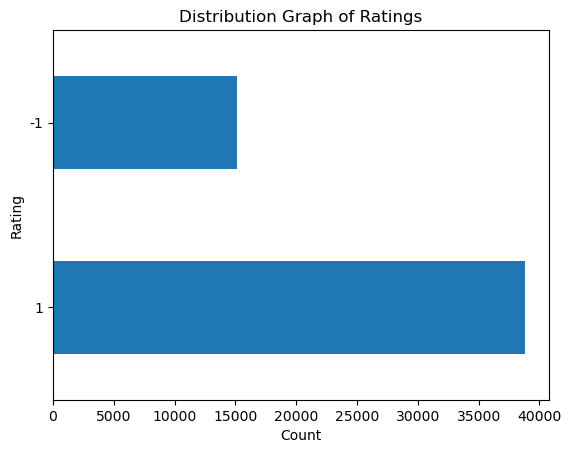

In [23]:
##Question 1

##loading in the dr_review

import pandas as pd

path='./DR_REVIEW/ratemd-dr-ratings.csv'
drReview=pd.read_csv(path)

print('Number of Entries:',drReview.shape[0])
print('Number of Unique Doctors:',drReview['dr-id-adjusted'].nunique(),'\n')

ratings=drReview['rating'].value_counts()
print("Distribution of Ratings:\n",ratings)

ratings.plot(kind='barh',title='Distribution Graph of Ratings', xlabel='Count',ylabel='Rating')

# Question 2

In [24]:
## Question 2

import nltk
import string
from tqdm.notebook import tqdm

stopWords=set(nltk.corpus.stopwords.words('english'))
punctuations=string.punctuation

def preprocess(text):
    tokens=nltk.word_tokenize(text.lower())
    tokensClean=[t for t in tokens if (t not in stopWords) and (t not in punctuations)]
    return ' '.join(tokensClean)

tqdm.pandas()
drReview['review-text-cleaned']=drReview['review-text-cleaned'].progress_apply(preprocess)

  0%|          | 0/54017 [00:00<?, ?it/s]

In [25]:
## Question 2 Continued
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

## Obtaining top 10 words (after tokenization and preprocessing)
stringOfReviews=' '.join(drReview['review-text-cleaned'])
words=stringOfReviews.split()
wordsFrequency=Counter(words)
sortedWords=sorted(wordsFrequency.items(),key=lambda x: x[1], reverse=True)

def topWords(inputWords):
    print('TOP 10 WORDS IN REVIEW TEXT:')
    for i in range (9):
        print('WORD:',inputWords[i][0],'//FREQUENCY:',inputWords[i][1])

topWords(sortedWords)

TFIDFVector=TfidfVectorizer()
tfidf=TFIDFVector.fit_transform([stringOfReviews])
features=TFIDFVector.get_feature_names_out()
scores=tfidf.toarray()[0]
zippedFeatures=list(zip(features,scores))
sortedFeatures=sorted(zippedFeatures, key=lambda x: x[1], reverse=True)
print('\n')
def topTFIDF(inputFeature):
    print('TOP 10 TFIDF SCORES:')
    for i in range (9):
        print('WORD:',inputFeature[i][0],'//TFIDF SCORE:',inputFeature[i][1])

topTFIDF(sortedFeatures)


TOP 10 WORDS IN REVIEW TEXT:
WORD: dr. //FREQUENCY: 31291
WORD: doctor //FREQUENCY: 24216
WORD: time //FREQUENCY: 15234
WORD: n't //FREQUENCY: 14816
WORD: would //FREQUENCY: 13848
WORD: staff //FREQUENCY: 12321
WORD: 's //FREQUENCY: 11607
WORD: office //FREQUENCY: 10256
WORD: great //FREQUENCY: 9796


TOP 10 TFIDF SCORES:
WORD: dr //TFIDF SCORE: 0.5525697769641569
WORD: doctor //TFIDF SCORE: 0.32514718112455115
WORD: time //TFIDF SCORE: 0.20448398493033731
WORD: would //TFIDF SCORE: 0.18426510521621067
WORD: staff //TFIDF SCORE: 0.1646963075926301
WORD: office //TFIDF SCORE: 0.137498995641213
WORD: great //TFIDF SCORE: 0.13074610208839774
WORD: quot //TFIDF SCORE: 0.12111427356316418
WORD: recommend //TFIDF SCORE: 0.10845757326967545


# Question 3

In [26]:
## Question 3

from sklearn.cluster import KMeans

TFIDFVector=TfidfVectorizer()
first10KRows=drReview[0:10000]
first10KReviews=first10KRows['review-text-cleaned']
tfidf=TFIDFVector.fit_transform(first10KReviews)
features=TFIDFVector.get_feature_names_out()

def kMeansFunc(clusterCount):
    km=KMeans(n_clusters=clusterCount,n_init='auto').fit(tfidf)
    top10Words=km.cluster_centers_.argsort()[:,-10:]
    print(f'With {clusterCount} Clusters:')
    print(features[top10Words])
    return km

kMeans2=kMeansFunc(2)
kMeans3=kMeansFunc(3)
kMeans5=kMeansFunc(5)
kMeans10=kMeansFunc(10)

With 2 Clusters:
[['excellent' 'helpful' 'caring' 'recommend' 'staff' 'time'
  'knowledgeable' 'dr' 'great' 'doctor']
 ['see' 'like' 'never' 'staff' 'time' 'would' 'office' 'quot' 'doctor'
  'dr']]
With 3 Clusters:
[['recommend' 'excellent' 'staff' 'time' 'dr' 'great' 'doctor' 'bedside'
  'manner' 'good']
 ['staff' 'get' 'see' 'never' 'time' 'would' 'office' 'doctor' 'dr'
  'quot']
 ['recommend' 'helpful' 'best' 'time' 'caring' 'knowledgeable' 'staff'
  'great' 'doctor' 'dr']]
With 5 Clusters:
[['helpful' 'excellent' 'knowledgeable' 'best' 'always' 'good' 'caring'
  'time' 'dr' 'doctor']
 ['appointment' 'get' 'see' 'wait' 'never' 'time' 'dr' 'doctor' 'staff'
  'office']
 ['helpful' 'caring' 'time' 'knowledgeable' 'manner' 'bedside' 'dr'
  'staff' 'doctor' 'great']
 ['went' 'like' 'one' 'care' 'would' 'pain' 'surgery' 'doctor' 'quot'
  'dr']
 ['time' 'staff' 'excellent' 'knowledgeable' 'doctor' 'anyone' 'dr'
  'highly' 'would' 'recommend']]
With 10 Clusters:
[['surgery' 'see' 'get' 'wou

**Response to Question 3**

One problem caused by high dimensionality is the curse of dimensionality, which is that as the dimensions increase, the distances become more difficult to measure significant differences. This problem could be alleviated by using dimensionality reduction techniques such as principal component analysis (PCA).

Another problem is difficulty of interpretability and initial clustering selection. For example, in the KNN performed above, some of the clusters are difficult to interpret. KNN approaches can usually select random number of clusters to create before iteratively repeating the process to further create interpretable clusters. However, when there is a high dimensionality vector as the feature space, this may sometimes be difficult as the data might not have good separability, and so is very sensitive to changes in cluster counts. This problem could be addressed by testing out multiple clusters multiple times each. However, this would require some domain knowledge to ensure that the clusters make sense and has substantial topic divisions (ie., that each cluster meaningfully identifies some commonality or topic).

# Question 4

In [27]:
## Question 4
#!pip install pyLDAvis

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim import corpora, models


texts=list(first10KRows['review-text-cleaned'])
tokenizedTexts=[text.split() for text in texts]
dictionary=corpora.Dictionary(tokenizedTexts)
dictionary.filter_extremes(no_below=5,no_above=0.8)

bowCorpus=[dictionary.doc2bow(text) for text in tokenizedTexts]

##modelling for 5 topics

print('5 Topics Modelled:')
lda = models.LdaModel(bowCorpus, num_topics=5, 
                    id2word=dictionary, 
                    update_every=5, 
                    chunksize=1000, 
                    passes=15)
lda.show_topics()


5 Topics Modelled:


[(0,
  '0.034*"dr." + 0.028*"doctor" + 0.020*"great" + 0.017*"best" + 0.016*"recommend" + 0.014*"would" + 0.013*"caring" + 0.012*"staff" + 0.012*"time" + 0.011*"knowledgeable"'),
 (1,
  '0.038*"dr." + 0.018*"staff" + 0.017*"years" + 0.017*"office" + 0.017*"doctor" + 0.014*"time" + 0.013*"always" + 0.012*"\'s" + 0.011*"care" + 0.009*"great"'),
 (2,
  '0.016*"office" + 0.015*"dr." + 0.014*"staff" + 0.014*"like" + 0.013*"would" + 0.012*"doctor" + 0.011*"rude" + 0.010*"n\'t" + 0.009*"visit" + 0.008*"quot"'),
 (3,
  '0.021*"surgery" + 0.018*"dr." + 0.017*"pain" + 0.012*"went" + 0.011*"back" + 0.010*"told" + 0.009*"would" + 0.008*"n\'t" + 0.007*"quot" + 0.007*"said"'),
 (4,
  '0.025*"n\'t" + 0.018*"doctor" + 0.017*"quot" + 0.015*"time" + 0.012*"\'s" + 0.009*"see" + 0.009*"get" + 0.008*"dr." + 0.008*"go" + 0.008*"would"')]

In [28]:
## Question 4 Continued

print('5 Topics Modelled Visualization:')
visData=gensimvis.prepare(lda,bowCorpus,dictionary)
pyLDAvis.display(visData)

5 Topics Modelled Visualization:


In [29]:
## Question 4 Continued

##modelling for 10 topics

print('10 Topics Modelled:')
lda = models.LdaModel(bowCorpus, num_topics=10, 
                    id2word=dictionary, 
                    update_every=5, 
                    chunksize=1000, 
                    passes=15)
lda.show_topics()


10 Topics Modelled:


[(0,
  '0.020*"doctor" + 0.017*"time" + 0.016*"dr." + 0.015*"calls" + 0.013*"child" + 0.011*".." + 0.011*"\'s" + 0.008*"office" + 0.008*"phone" + 0.007*"results"'),
 (1,
  '0.017*"n\'t" + 0.015*"office" + 0.014*"time" + 0.013*"get" + 0.013*"dr." + 0.012*"doctor" + 0.012*"see" + 0.012*"appointment" + 0.010*"wait" + 0.009*"back"'),
 (2,
  '0.026*"visit" + 0.023*"quot" + 0.017*"would" + 0.012*"doctor" + 0.011*"felt" + 0.010*"insurance" + 0.010*"treated" + 0.009*"dr." + 0.008*"recommend" + 0.006*"rate"'),
 (3,
  '0.031*"dr." + 0.028*"time" + 0.021*"staff" + 0.020*"doctor" + 0.017*"always" + 0.017*"great" + 0.015*"office" + 0.014*"questions" + 0.014*"\'s" + 0.012*"feel"'),
 (4,
  '0.035*"quot" + 0.020*"n\'t" + 0.020*"doctor" + 0.012*"would" + 0.010*"rude" + 0.009*"office" + 0.009*"\'s" + 0.008*"never" + 0.008*"told" + 0.008*"said"'),
 (5,
  '0.034*"pain" + 0.032*"surgery" + 0.023*"dr." + 0.014*"n\'t" + 0.014*"went" + 0.013*"back" + 0.009*"told" + 0.007*"procedure" + 0.007*"problem" + 0.006*

In [30]:
## Question 4 Continued

print('10 Topics Modelled Visualization:')
visData=gensimvis.prepare(lda,bowCorpus,dictionary)
pyLDAvis.display(visData)

10 Topics Modelled Visualization:


**Response to Question 4**

5 Topics Modelled:
[(0,
  '0.034*"dr." + 0.024*"time" + 0.016*"doctor" + 0.012*"questions" + 0.012*"always" + 0.011*"office" + 0.011*"staff" + 0.010*"patient" + 0.010*"\'s" + 0.010*"care"'),
 (1,
  '0.015*"dr." + 0.014*"n\'t" + 0.013*"surgery" + 0.011*"told" + 0.010*"pain" + 0.010*"doctor" + 0.009*"back" + 0.009*"office" + 0.009*"would" + 0.008*"went"'),
 (2,
  '0.037*"dr." + 0.023*"doctor" + 0.023*"great" + 0.021*"staff" + 0.018*"recommend" + 0.015*"would" + 0.014*"best" + 0.013*"caring" + 0.012*"highly" + 0.012*"knowledgeable"'),
 (3,
  '0.035*"n\'t" + 0.017*"doctor" + 0.016*"like" + 0.015*"would" + 0.014*"\'s" + 0.009*"dr." + 0.009*"time" + 0.008*".." + 0.008*"get" + 0.007*"know"'),
 (4,
  '0.033*"quot" + 0.020*"doctor" + 0.010*"dr." + 0.009*"\'s" + 0.008*"would" + 0.008*"one" + 0.008*"dr" + 0.008*"patients" + 0.007*"rude" + 0.006*"office"')]

10 Topics Modelled:
[(0,
  '0.031*"dr." + 0.028*"doctor" + 0.025*"time" + 0.020*"staff" + 0.018*"great" + 0.017*"always" + 0.014*"knowledgeable" + 0.014*"caring" + 0.013*"recommend" + 0.012*"helpful"'),
 (1,
  '0.027*"dr." + 0.026*"great" + 0.017*"son" + 0.014*"pain" + 0.012*"dr" + 0.010*"manner" + 0.010*"bedside" + 0.010*"back" + 0.010*"years" + 0.009*"doctor"'),
 (2,
  '0.059*"surgery" + 0.030*"dr." + 0.018*"surgeon" + 0.016*"would" + 0.011*"recommend" + 0.010*"doctor" + 0.009*"pain" + 0.008*"performed" + 0.007*"bedside" + 0.007*"manner"'),
 (3,
  '0.017*"dentist" + 0.014*"dr." + 0.012*"n\'t" + 0.011*"teeth" + 0.011*"pain" + 0.010*"could" + 0.009*"work" + 0.008*"quot" + 0.008*"went" + 0.007*"dr"'),
 (4,
  '0.031*"doctor" + 0.025*"n\'t" + 0.016*"like" + 0.015*"would" + 0.014*"quot" + 0.011*"never" + 0.009*"see" + 0.009*"ever" + 0.008*"rude" + 0.008*"\'s"'),
 (5,
  '0.032*"dr." + 0.018*"doctor" + 0.018*"\'s" + 0.014*"time" + 0.014*"patients" + 0.012*"best" + 0.011*"great" + 0.010*"one" + 0.010*"care" + 0.010*"doctors"'),
 (6,
  '0.019*"office" + 0.018*"n\'t" + 0.012*"staff" + 0.012*"doctor" + 0.012*"time" + 0.011*"get" + 0.011*"appointment" + 0.011*"back" + 0.011*"told" + 0.010*"would"'),
 (7,
  '0.029*"quot" + 0.014*"amp" + 0.010*"baby" + 0.009*"dr." + 0.009*"would" + 0.009*"dr" + 0.008*"doctor" + 0.008*"n\'t" + 0.007*"one" + 0.007*"went"'),
 (8,
  '0.051*"dr." + 0.019*"staff" + 0.015*"recommend" + 0.015*"would" + 0.015*"best" + 0.012*"doctor" + 0.010*"care" + 0.009*"highly" + 0.009*"office" + 0.008*"years"'),
 (9,
  '0.031*"dr." + 0.018*"office" + 0.016*"patients" + 0.016*"\'s" + 0.014*"patient" + 0.014*"years" + 0.014*"care" + 0.013*"staff" + 0.011*"good" + 0.011*"quot"')]


For most of the topics, there is a lot of overlapping words that are general in the context of a health setting. For example, 'doctor' and 'dr' are present in a lot of the topics. This is true in both the 5 topic modelling and in the 10 topic modelling. However, most of the words does make sense when thinking about whether the topic is showing positive or negative reviews. For example, 'rude' indicates heavily that the review is negative. These negative words also do not come under the same topics as positive ones. Instead, they tend to stick together under one topic. For instance, 

0.018*"recommend" + 0.015*"would" + 0.014*"best" + 0.013*"caring" + 0.012*"highly" + 0.012*"knowledgeable"

are all in the same topic and have a lot of words that signify positive reviews. Nevertheless, it is quite difficult to discern the exact topics that are being modelled aside from some specific words such as 'surgery' or 'baby', which would indicate some sort of surgical procedure or a doctor specializing in infants. Most of the topics being modelled has quite general words and is hard to distinguish aside from whether the review is positive or negative.

Another interesting pattern observed through the visualization of the topics is that as the number of topics increases, there tends to be more overlap. However, some other topics are also separated from the rest (e.g., most topics are clustered in the bottom left but there is only one cluster in the top left). However, even for some of these that are separated from each other based on the PCA are still difficult to confidently identify what topic is being discussed.

# Question 5

[['excellent' 'helpful' 'caring' 'recommend' 'staff' 'time'
  'knowledgeable' 'dr' 'great' 'doctor']
 ['see' 'like' 'never' 'staff' 'time' 'would' 'office' 'quot' 'doctor'
  'dr']]


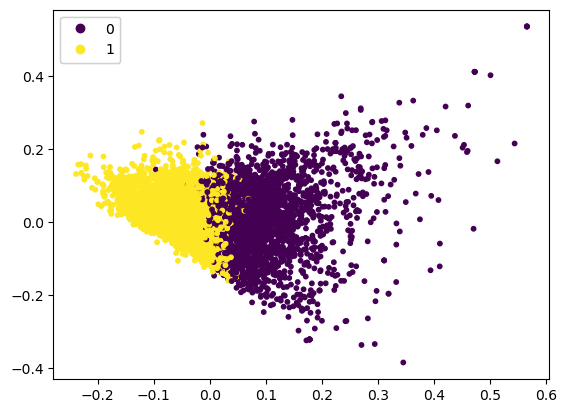

In [31]:
## Question 5

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## The cluster is saved as kMeans2
## To get the features do the following:
# features[kMeans2.cluster_centers_.argsort()]
def PCAPlot(kMeans):
    PCA2dim=PCA(n_components=2).fit_transform(tfidf.toarray())
    fig,ax=plt.subplots()
    scatter=ax.scatter(PCA2dim[:,0],PCA2dim[:,1],c=kMeans.labels_,s=10)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="")
    ax.add_artist(legend1)

PCAPlot(kMeans2)
top10WordsIndex=kMeans2.cluster_centers_.argsort()[:,-10:]
print(features[top10WordsIndex])

# Question 6

In [32]:
## Question 6

import gensim.downloader as api
import numpy as np

modelGlove=api.load('glove-twitter-25')

TOP 10 TFIDF SCORES:
WORD: dr //TFIDF SCORE: 0.5525697769641569
WORD: doctor //TFIDF SCORE: 0.32514718112455115
WORD: time //TFIDF SCORE: 0.20448398493033731
WORD: would //TFIDF SCORE: 0.18426510521621067
WORD: staff //TFIDF SCORE: 0.1646963075926301
WORD: office //TFIDF SCORE: 0.137498995641213
WORD: great //TFIDF SCORE: 0.13074610208839774
WORD: quot //TFIDF SCORE: 0.12111427356316418
WORD: recommend //TFIDF SCORE: 0.10845757326967545


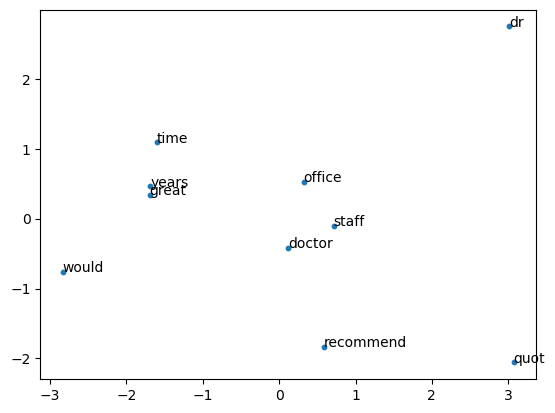

In [33]:
## Question 6 Continued

top10Words=[]
for word in sortedFeatures[:10]:
    top10Words.append(word[0])

# Used to check TFIDF Scores are consistent with features given   
topTFIDF(sortedFeatures)


def visualization(topWords):
    top10Emb=[modelGlove[word] for word in topWords]
    #print(top10Emb)
    emb2D=PCA(n_components=2).fit_transform(np.array(top10Emb))
    fig, ax = plt.subplots()
    plt.scatter(emb2D[:, 0], emb2D[:, 1], s=10)
    for i, w in enumerate(topWords):
        ax.text(emb2D[i, 0], emb2D[i, 1], w)

visualization(top10Words)

**Response to Question 6**

There doesn't seem to be a lot of semantic similarity between the words. The most glaring example is 'dr' and 'doctor', which should have a lot of semantic similarity, but they are very far away from each other. 

However, there are still some semantic similarities that can be observed that makes sense. For example, 'years' and 'time' are quite close and they both relate to chronology. 'doctor' and 'staff' are also close, and they both relate to personnel. However, these distances are still quite moderately far away from each other.


# Question 7

In [34]:
## Question 7

## split into positive and negative reviews
positiveReviews=drReview[drReview['rating']==1]
negativeReviews=drReview[drReview['rating']==-1]

## PROCESS THE DATA FOR TFIDF VECTORIZING
stringOfReviewsPositive=' '.join(positiveReviews['review-text-cleaned'])
stringOfReviewsNegative=' '.join(negativeReviews['review-text-cleaned'])

positiveWords=stringOfReviewsPositive.split()
negativeWords=stringOfReviewsNegative.split()

wordsFrequencyPositive=Counter(positiveWords)
wordsFrequencyNegative=Counter(negativeWords)

sortedWordsPositive=sorted(wordsFrequencyPositive.items(),key=lambda x: x[1],reverse=True)
sortedWordsNegative=sorted(wordsFrequencyNegative.items(),key=lambda x: x[1],reverse=True)

## PERFORM TFIDF VECTORIZING FOR POSITIVE REVIEWS
TFIDFVectorPositive=TfidfVectorizer()
tfidfPositive=TFIDFVectorPositive.fit_transform([stringOfReviewsPositive])
featuresPositive=TFIDFVectorPositive.get_feature_names_out()
scoresPositive=tfidfPositive.toarray()[0]
zippedFeaturesPositive=list(zip(featuresPositive,scoresPositive))
sortedFeaturesPositive=sorted(zippedFeaturesPositive,key=lambda x: x[1],reverse=True)

## PERFORM TFIDF VECTORIZING FOR NEGATIVE REVIEWS
TFIDFVectorNegative=TfidfVectorizer()
tfidfNegative=TFIDFVectorNegative.fit_transform([stringOfReviewsNegative])
featuresNegative=TFIDFVectorNegative.get_feature_names_out()
scoresNegative=tfidfNegative.toarray()[0]
zippedFeaturesNegative=list(zip(featuresNegative,scoresNegative))
sortedFeaturesNegative=sorted(zippedFeaturesNegative,key=lambda x: x[1],reverse=True)


print("---POSITIVE REVIEWS---")
#topWords(sortedWordsPositive)
topTFIDF(sortedFeaturesPositive)

print("\n---NEGATIVE REVIEWS---")
#topWords(sortedWordsNegative)
topTFIDF(sortedFeaturesNegative)


---POSITIVE REVIEWS---
TOP 10 TFIDF SCORES:
WORD: dr //TFIDF SCORE: 0.6029023224305176
WORD: doctor //TFIDF SCORE: 0.2998877309978838
WORD: time //TFIDF SCORE: 0.20608191795538378
WORD: staff //TFIDF SCORE: 0.17254088596635034
WORD: great //TFIDF SCORE: 0.1705593290629332
WORD: would //TFIDF SCORE: 0.15454325904540556
WORD: best //TFIDF SCORE: 0.12834671319380817
WORD: always //TFIDF SCORE: 0.12443813765037066
WORD: recommend //TFIDF SCORE: 0.12127491837335613

---NEGATIVE REVIEWS---
TOP 10 TFIDF SCORES:
WORD: dr //TFIDF SCORE: 0.3594478036224674
WORD: doctor //TFIDF SCORE: 0.3393702336345992
WORD: quot //TFIDF SCORE: 0.23987189628965744
WORD: would //TFIDF SCORE: 0.22822351707728666
WORD: time //TFIDF SCORE: 0.1726925165412208
WORD: office //TFIDF SCORE: 0.1691344661636239
WORD: told //TFIDF SCORE: 0.15968868956595594
WORD: never //TFIDF SCORE: 0.15646950112908256
WORD: get //TFIDF SCORE: 0.1257601377510141


---POSITIVE REVIEWS---


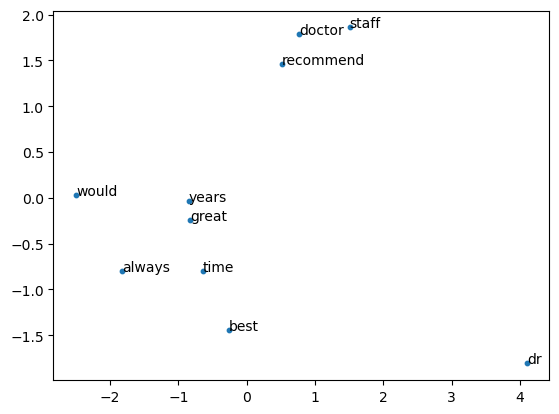

In [35]:
## Question 7 Continued

print("---POSITIVE REVIEWS---")
top10WordsPositive=[]
for word in sortedFeaturesPositive[:10]:
    top10WordsPositive.append(word[0])
visualization(top10WordsPositive)


---NEGATIVE REVIEWS---


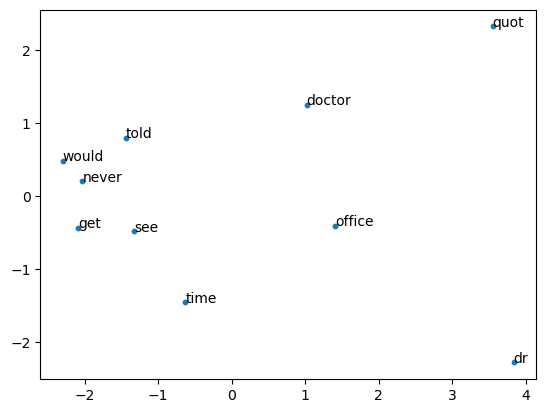

In [36]:
## Question 7 Continued

print("---NEGATIVE REVIEWS---")
top10WordsNegative=[]
for word in sortedFeaturesNegative[:10]:
    top10WordsNegative.append(word[0])
visualization(top10WordsNegative)

# Question 8

In [37]:
## Question 8

import warnings
from sklearn.model_selection import GroupShuffleSplit

warnings.filterwarnings('ignore')

splitter=GroupShuffleSplit(test_size=0.3,n_splits=2,random_state=42)
splitData=splitter.split(drReview,groups=drReview['dr-id-adjusted'])
train,temp=next(splitData)

trainSet=drReview.iloc[train]
tempSet=drReview.iloc[temp]

splitter=GroupShuffleSplit(test_size=0.33,n_splits=2,random_state=42)
splitData=splitter.split(tempSet,groups=tempSet['dr-id-adjusted'])
validation,test=next(splitData)

validationSet=tempSet.iloc[validation]
testSet=tempSet.iloc[test]

## check that the split was done correctly

trainIDs=set(trainSet['dr-id-adjusted'].unique())
validationIDs=set(validationSet['dr-id-adjusted'].unique())
testIDs=set(testSet['review-text-cleaned'].unique())

assert len(trainIDs.intersection(validationIDs))==0
assert len(validationIDs.intersection(testIDs))==0
assert len(testIDs.intersection(trainIDs))==0

print('Number of Reviews in Full Document:',len(drReview))
print('Number of Reviews in Train Set:',len(trainSet))
print('Number of Reviews in Validation Set:',len(validationSet))
print('Number of Reviews in Test Set:',len(testSet))


print('PASSED ASSERTION CHECKS')

Number of Reviews in Full Document: 54017
Number of Reviews in Train Set: 37737
Number of Reviews in Validation Set: 10799
Number of Reviews in Test Set: 5481
PASSED ASSERTION CHECKS


# Question 9

In [38]:
## Question 9

## Data is already preprocess during the splits in Q8

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, roc_auc_score

countVector=CountVectorizer()
countVector.fit(trainSet['review-text-cleaned'])

drReview['review-text-cleaned']
drReview['rating']

def datasetSplit(data):
    datasetFeatures=data['review-text-cleaned']
    datasetLabels=data['rating']
    bowFeatures=countVector.transform(data['review-text-cleaned'])
    return datasetFeatures,datasetLabels,bowFeatures

trainFeatures,trainLabels,trainBOWFeatures=datasetSplit(trainSet)
validationFeatures,validationLabels,validationBOWFeatures=datasetSplit(validationSet)
testFeatures,testLabels,testBOWFeatures=datasetSplit(testSet)

## HYPERPARAMETER TUNING
# logisticRegressionModelTuning=LogisticRegression()
# param_grid={
#     'C':[0.001,0.01,0.1,1,10,100],
#     'solver':['newton-cg','lbfgs','sag','saga','liblinear']
# }
# gs=GridSearchCV(logisticRegressionModelTuning,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

# gs.fit(trainBOWFeatures,trainLabels)
# bestParams=gs.best_params_
# print(bestParams)

## Best hyperparameters obtained
# {'C': 1, 'solver': 'saga'}

logisticRegressionModel=LogisticRegression(C=0.1,solver='saga')
logisticRegressionModel.fit(trainBOWFeatures,trainLabels)
predictions=logisticRegressionModel.predict(testBOWFeatures)
accuracy=accuracy_score(predictions,testLabels)
AUROCScore=roc_auc_score(testLabels,logisticRegressionModel.predict_proba(testBOWFeatures)[:,1])

print('Accuracy on Test Set:', accuracy)
print('AUROC Score on Test Set:',AUROCScore)


Accuracy on Test Set: 0.9129720853858785
AUROC Score on Test Set: 0.9703507920626263
